In [1]:
#Dependencies.
import tweepy
import json
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import and Initialize Sentiment Analyzer.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Twitter API Keys
from config import (consumer_key, consumer_secret, access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
sentiments = []

target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

#Loop though target users.

for user in target_users:
    
    #Counter 

    counter = 0
    
    #Loop through 5 pages of tweets for each news organization.


    #Get all tweets from the homefeed of each news organization.

    public_tweets = api.user_timeline(user, count = 100)

        #Loop all tweets.

    for tweet in public_tweets:
      

        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        #Add each tweet to the sentiments list.

        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})
        #Add to counter.

        counter = counter + 1

In [6]:
#Create DataFrame.
tweet_df = pd.DataFrame.from_dict(sentiments)
tweet_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.0000,Sun Sep 16 17:04:06 +0000 2018,0.000,1.000,0.000,From overnight oats to kids' fruit cobbler: he...,0,@BBC
1,0.0000,Sun Sep 16 16:02:03 +0000 2018,0.000,1.000,0.000,From Viola Davis to Robert Pattinson: these ar...,1,@BBC
2,0.0000,Sun Sep 16 15:03:04 +0000 2018,0.000,1.000,0.000,"""You cannot make clothes without pockets!"" \n\...",2,@BBC
3,-0.1531,Sun Sep 16 14:04:05 +0000 2018,0.176,0.676,0.149,A new scientific study suggests that there are...,3,@BBC
4,0.0000,Sun Sep 16 14:01:39 +0000 2018,0.000,1.000,0.000,RT @BBCSport: We ❤️ Vera! https://t.co/4jTELqBPBv,4,@BBC


In [7]:
#CSV file
tweet_df.to_csv("NewsMood_data.csv", index=False)

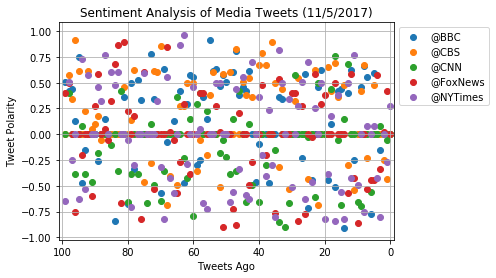

In [8]:
# Set the x limit,
plt.xlim(101, -1)

#plot scatterplot using a for loop.
for user in target_users:
    dataframe = tweet_df.loc[tweet_df["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = user)
    
#Add legend
plt.legend(bbox_to_anchor = (1,1))

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of Media Tweets (11/5/2017)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()

plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

In [12]:
#count Average tweets
average_tweet = tweet_df.groupby("User")["Compound"].mean()
average_tweet

User
@BBC        0.121068
@CBS        0.155823
@CNN       -0.098237
@FoxNews   -0.009149
@NYTimes   -0.013350
Name: Compound, dtype: float64

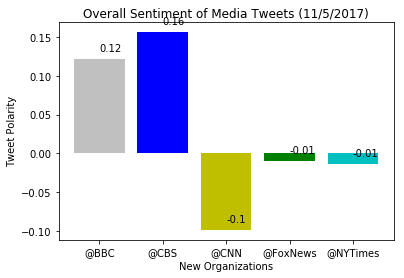

In [13]:
# X Axis and X lables 
x_axis = np.arange(len(average_tweet))
xlabels = average_tweet.index

count = 0

for sentiment in average_tweet:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
    
plt.bar(x_axis, average_tweet, tick_label = xlabels, color = ['silver', 'b', 'y', 'g', 'c'])
#Set title, x axis label, and y axis label.
plt.title("Overall Sentiment of Media Tweets (11/5/2017)")
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of Media Tweets")
plt.show()